# Data preparation

In [1]:
import pandas as pd
import os
import kagglehub


# downloading
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")
# follow path
csv_file = os.path.join(path, "healthcare-dataset-stroke-data.csv")
df = pd.read_csv(csv_file)
df = df.dropna()
df.reset_index(drop=True, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Attribute Information
#### 1) id: unique identifier
#### 2) gender: "Male", "Female" or "Other"
#### 3) age: age of the patient
#### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
#### 6) ever_married: "No" or "Yes"
#### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
#### 8) Residence_type: "Rural" or "Urban"
#### 9) avg_glucose_level: average glucose level in blood
#### 10) bmi: body mass index
#### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
#### 12) stroke: 1 if the patient had a stroke or 0 if not

## Data Exploratory

### explore potential relationships between the target variable and the other variables

In [3]:
# Can we correlate the gender with the risk of stroke? → No.
# P(stroke|gender)
pd.crosstab(df['gender'], df['stroke'], normalize='index') * 100

stroke,0,1
gender,,
Female,95.857784,4.142216
Male,95.574341,4.425659
Other,100.000000,0.000000


In [4]:
# Is stroke more common among people with hypertension? → Yes.
# P(Stroke|Hypertension)
pd.crosstab(df['hypertension'], df['stroke'], normalize='index') * 100

stroke,0,1
hypertension,,
0,96.657694,3.342306
1,86.696231,13.303769


In [5]:
# Is stroke more common among people with heart disease? → Yes.
# P(Stroke|Heart Disease)
pd.crosstab(df['heart_disease'], df['stroke'], normalize='index') * 100

stroke,0,1
heart_disease,,
0,96.378054,3.621946
1,83.539095,16.460905


In [6]:
# Is stroke more common among people ever married? → Yes.
pd.crosstab(df['ever_married'], df['stroke'], normalize='index') * 100

stroke,0,1
ever_married,,
No,98.651026,1.348974
Yes,94.194757,5.805243


In [7]:
# Can we correlate the residence type with the risk of stroke? → No.
pd.crosstab(df['Residence_type'], df['stroke'], normalize='index') * 100

stroke,0,1
Residence_type,,
Rural,95.86606,4.13394
Urban,95.62249,4.37751


In [8]:
# Can we correlate the smoking status with the risk of stroke? → Kind of, but not for sure
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100

stroke,0,1
smoking_status,,
Unknown,98.044504,1.955496
formerly smoked,93.189964,6.810036
never smoked,95.464363,4.535637
smokes,94.708277,5.291723


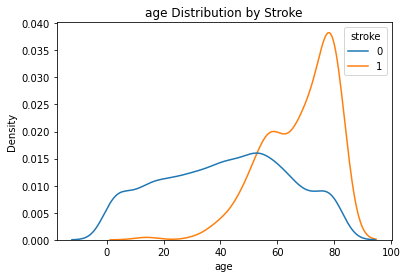

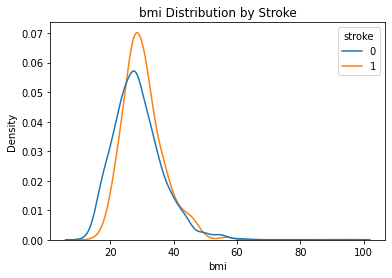

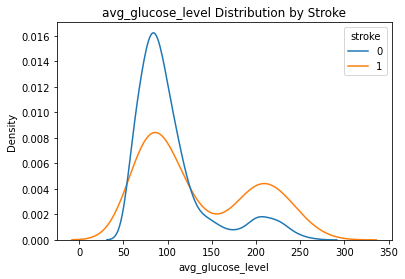

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# age and the average glucose level seem to relate to the stroke probability
for col in ['age', 'bmi', 'avg_glucose_level']:
    sns.kdeplot(data=df, x=col, hue='stroke', common_norm=False)
    plt.title(f'{col} Distribution by Stroke')
    plt.show()

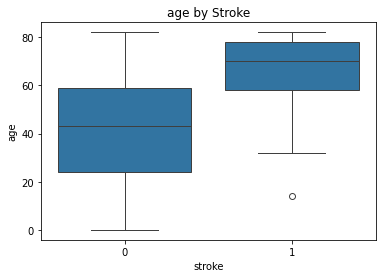

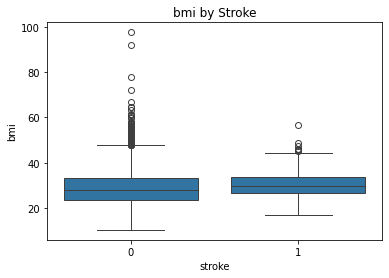

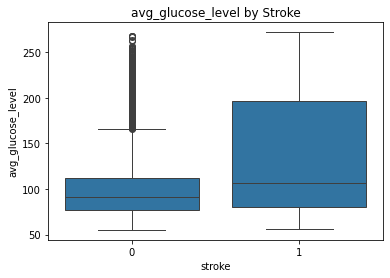

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['age', 'bmi', 'avg_glucose_level']:
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} by Stroke')
    plt.show()


# Data Preprocessing

## Step 1. Continuoius -> bin

#### To feed this data into the Bayesian Network, continuous variables must be converted into categorical format. We identified age, BMI, and average glucose level are continuous variable. Therefore, we bin these variables into categorical variables by grouping them into categorical intervals.

## 1) Age

min: 0.08 , max: 82.0


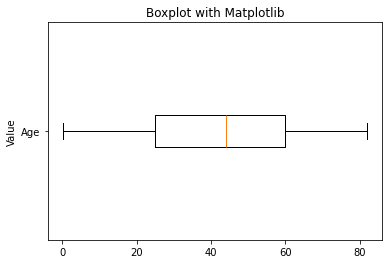

In [13]:
import matplotlib.pyplot as plt
print('min:', df['age'].min(), ",", 'max:', df['age'].max())

# boxplot
plt.boxplot(df['age'], vert=False, labels=['Age'])
plt.title('Boxplot with Matplotlib')
plt.ylabel('Value')
plt.show()

In [14]:
# age into three parts
age_bins = [0, 50, 65, 90] 
age_labels = ['Young', 'Middle-aged', 'Old']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

## 2) avg glucose level

min: 55.12 , max: 271.74


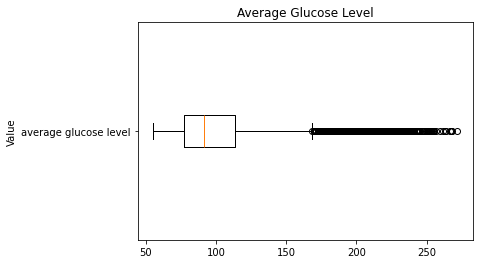

In [15]:
import matplotlib.pyplot as plt
print('min:', df['avg_glucose_level'].min(), ",", 'max:', df['avg_glucose_level'].max())

plt.boxplot(df['avg_glucose_level'], vert=False, labels=['average glucose level'])
plt.title('Average Glucose Level')
plt.ylabel('Value')
plt.show()

In [16]:
# avg_glucose_level bin
glucose_bins = [0, 130, 200, df['avg_glucose_level'].max()+0.1]
glucose_labels = ['Low', 'Normal', 'High']
df['glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

## 3) bmi

min: 10.3 , max: 97.6


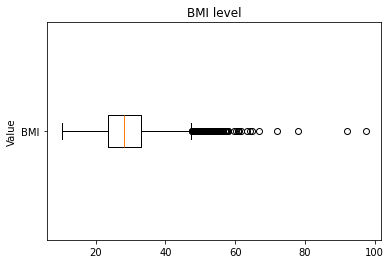

In [17]:
import matplotlib.pyplot as plt
print('min:', df['bmi'].min(), ",", 'max:', df['bmi'].max())

plt.boxplot(df['bmi'], vert=False, labels=['BMI'])
plt.title('BMI level')
plt.ylabel('Value')
plt.show()

In [18]:
# bmi level binning
bmi_bins = [0, 18.5, 25, 30, df['bmi'].max()]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Categorical variables (with low frequency)

#### For analyitcal conveniency, we handle values with very low frequency by either removing them or merging them with the nearest appropriate category.

In [19]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [20]:
df = df[df['gender'] != 'Other']

In [21]:
df = df[df['smoking_status'] != 'Unknown']
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [22]:
df.reset_index(drop=True, inplace=True)

## simplify fragmented categories

#### For ease of interpretation, we binned the Job variable into fewer categories based on the whether the individual has a job or not, focusing on its potential relevance to stroke.

In [23]:
df['work_type'].value_counts()

work_type
Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: count, dtype: int64

In [24]:
df['work_type'] = df['work_type'].replace( {'Private': 'Work', 'Self-employed':'Work', 'Govt_job': 'Work', 'children':'Never_worked'})

In [25]:
df['work_type'].value_counts()

work_type
Work            3343
Never_worked      82
Name: count, dtype: int64

# Binary into Categorical

#### For ease of interpretation, we transform binary values into "Yes" and "No" categories. This makes the bayesian net easier to read and understand.

In [26]:
binary_cols = ['hypertension', 'heart_disease', 'stroke']

for col in binary_cols:
    df[col] = df[col].replace({0: f'{col}_No', 1: f'{col}_Yes'})

In [27]:
features = ['gender', 'age_group', 'hypertension', 'heart_disease', 
            'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke',  'glucose_level_group', 'bmi_group']

In [29]:
df[features].to_csv('data_processed-v3.csv', index=False)